&nbsp;

# 1. Basic Exploration
Data exploration is a crucial step to understanding the underlying patterns and relationships inside your dataset. The most effective way to improving your output is not by tuning hyperparameters or trying out more complex models, it is in fact improving the quality of your data. Some tehcniques used to improve the quality of your dataset include: building new features, removing outliers and handling missing data. 

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plot_functions # Importing plot functions py file. 

# Splitting the dataset. 
from sklearn.model_selection import train_test_split

# Import transformers.
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() 
df = pd.read_csv(r"{}\boston_housing.csv".format(root), delim_whitespace=True, header=None)
bostonHeaders = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = bostonHeaders
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


&nbsp;

### Section A: Data Exploration
In this section we'll be focusing on analysing our dataset and try to locate any interesting insights, including any missing values or outliers that we should be aware of. 

**A.1: Setting Aside a Validation Set**<br> In this section we'll randomly shuffle our entire dataset and set aside a validation set to test our finalised model on at the end of the project.

In [3]:
# Splitting the data into features and label. 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Creating train and test splits, with a validation size % of 0.2.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
testData = pd.concat([X_test, y_test], axis=1) # Appending the test labels and features together to set aside as the holdout set. 
trainData = pd.concat([X_train, y_train], axis=1) # Creating the dataset we'll train our model on. 

testData.to_csv(r"{}\test.csv".format(root), index=False) # Exporting the test set to set aside for later. 
trainData.to_csv(r"{}\train.csv".format(root), index=False) # Exporting the train set to use as our main dataset. 
testData.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.4,6.75,20.7
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666.0,20.2,396.9,16.35,12.7


**A.2: Statistical Insights**<br> The next step is to gain insight on our data and learn about its underlying structure, this could be useful in understanding the correlation our features have towards the label.

In [4]:
trainData.info() # General structure of the data. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 266 to 331
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


* There are 404 rows of data and 14 columns in total, with 12 floats and 2 ints.
* There are no missing values.
* We are dealing with all numerical features.

In [5]:
trainData.describe() # Statistical summary. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.728542,11.632426,11.130470,0.074257,0.553150,6.275735,69.235149,3.830108,9.529703,409.829208,18.501485,355.974406,12.804802,22.392079
std,9.123026,23.559000,6.943018,0.262514,0.115347,0.698889,28.195032,2.190440,8.701365,168.586852,2.134881,92.439926,7.353883,9.231266
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.130000,0.000000,0.448000,5.879000,45.800000,2.102875,4.000000,283.250000,17.400000,374.710000,6.767500,16.575000
50%,0.234195,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.107300,5.000000,330.000000,19.100000,391.465000,11.490000,20.650000
75%,3.681942,18.500000,18.100000,0.000000,0.624000,6.618250,94.325000,5.212575,24.000000,666.000000,20.200000,396.285000,17.195000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* There seems to be a price cap in our target variable "MEDV" with the price maxed out at 50. This could disrupt the correlation score of some features, so we'll take note of it for now.

&nbsp;

### Section B: Distribution
Now it's time to check out the distribution of each numerical feature.

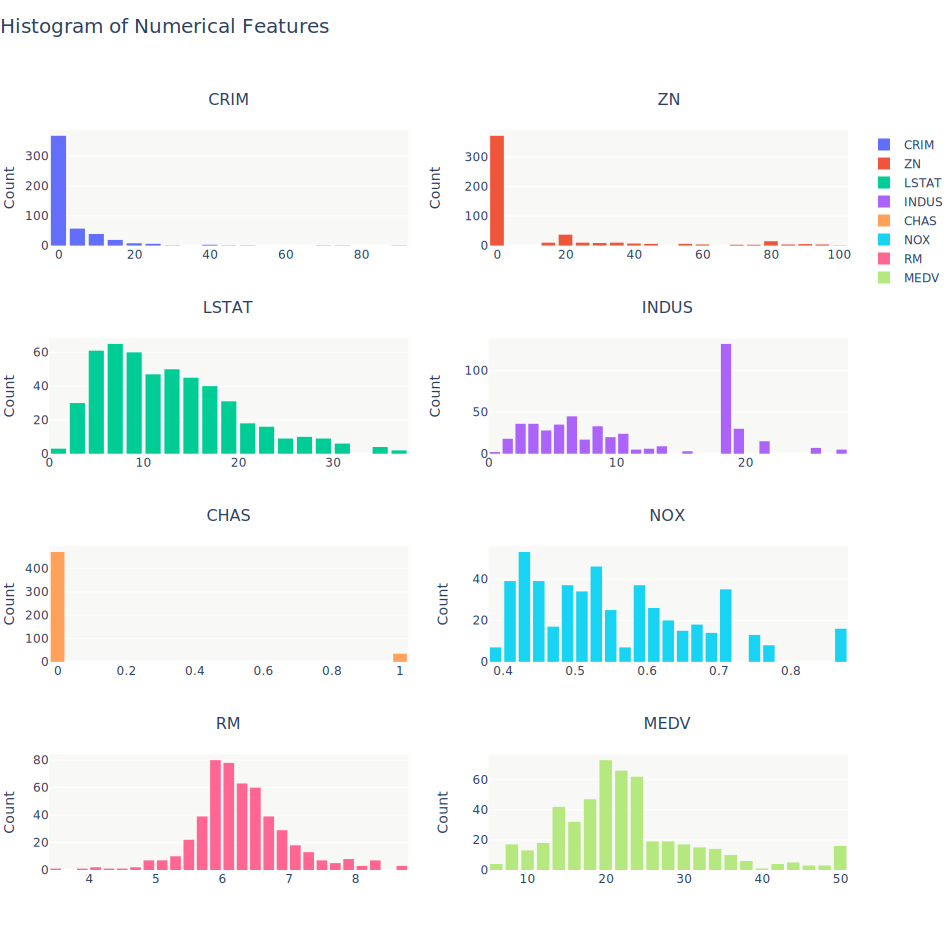

In [6]:
plot_functions.histogram(df=df)

* Gaussian Distributed features include: NOX, LSTAT, RM and our target variable MEDV.
* CHAS seems to be our only encoded feature.
* The rest of our features are asymmetric in shape. We can use some transforms later on (standardization or log) to convert them into a normal distribution.

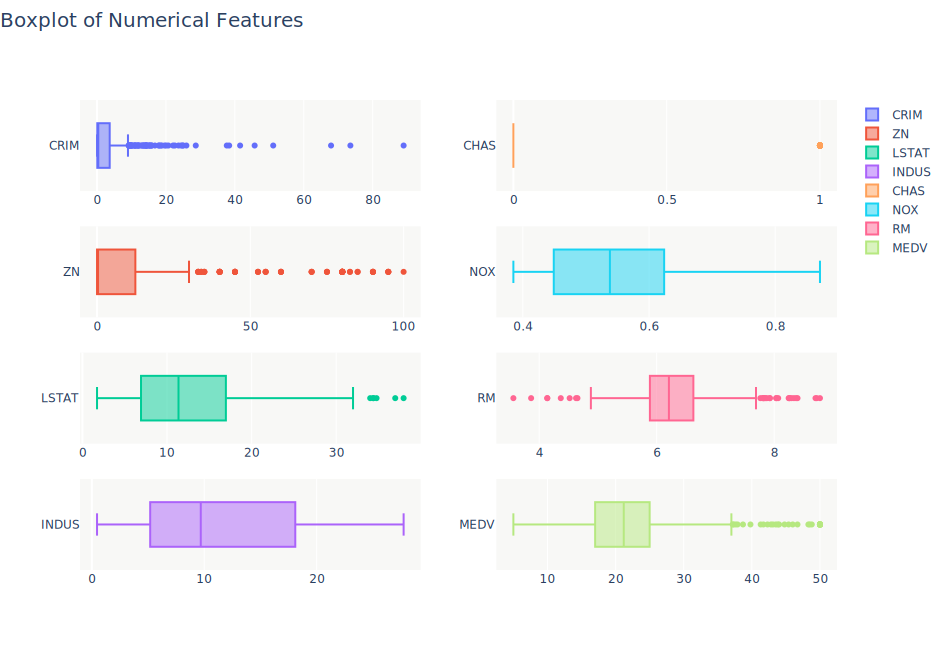

In [7]:
plot_functions.boxplot(df=df)

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  